In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/IDS")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import sklearn.utils
from keras import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import scipy, pylab

In [ ]:
file_name = 'andmed.csv'
df = pd.read_csv(file_name, delimiter=",", decimal=',')

In [ ]:
cols = list(df.columns)
for c in cols:
  print(c)
  print(df[c].isnull().sum())
  print()

total = df.size - df.count().sum()
print('Total sum of NaNs in the dataframe:', total)

Time
27

Time Code
27

Country Name
27

Percentage of graduates from tertiary education graduating from Agriculture, Forestry, Fisheries and Veterinary programmes, both sexes (%) [SE.TER.GRAD.AG.ZS]
11327

Government expenditure on education as % of GDP (%) [SE.XPD.TOTL.GD.ZS]
8237

Enrolment in tertiary education, all programmes, both sexes (number) [SE.TER.ENRL]
4677

Percentage of graduates from tertiary education graduating from Natural Sciences, Mathematics and Statistics programmes, both sexes (%) [SE.TER.GRAD.SC.ZS]
11330

Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]
2711

Energy use (kg of oil equivalent per capita)
4816

GDP per capita growth (annual %)
2391

CO2 emissions (metric tons per capita)
1488

Industry (including construction), value added (annual % growth)
4732

Manufacturing, value added (annual % growth)
5834

Urban population (% of total population)
166

Merchandise imports (current US$)
1873

Merchandise exports (current US$)
1869

Populatio

In [ ]:
#Drop dublicated columns, columns with large amount of Nan's and columns that has no mean to find features that impact CO2 emissions
df = df.drop(columns=['Merchandise exports (current US$)','Merchandise imports (current US$)','Industry (including construction), value added (annual % growth)','Time', 'Country Name', 'Time Code', 'Country Code_y', 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]', 'Percentage of graduates from tertiary education graduating from Agriculture, Forestry, Fisheries and Veterinary programmes, both sexes (%) [SE.TER.GRAD.AG.ZS]', 'Percentage of graduates from tertiary education graduating from Natural Sciences, Mathematics and Statistics programmes, both sexes (%) [SE.TER.GRAD.SC.ZS]', 'Government expenditure on education as % of GDP (%) [SE.XPD.TOTL.GD.ZS]'])

In [ ]:
#Drop rows that include NaN's.
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 274 to 12090
Data columns (total 11 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Enrolment in tertiary education, all programmes, both sexes (number) [SE.TER.ENRL]  3258 non-null   object 
 1   Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]                   3258 non-null   object 
 2   Energy use (kg of oil equivalent per capita)                                        3258 non-null   float64
 3   GDP per capita growth (annual %)                                                    3258 non-null   float64
 4   CO2 emissions (metric tons per capita)                                              3258 non-null   float64
 5   Manufacturing, value added (annual % growth)                                        3258 non-n

In [ ]:
#Create list of columns and transform all object type data to float64.
cols = list(data.columns)
data[cols] = data[cols].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 274 to 12090
Data columns (total 11 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Enrolment in tertiary education, all programmes, both sexes (number) [SE.TER.ENRL]  3258 non-null   float64
 1   Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]                   3258 non-null   float64
 2   Energy use (kg of oil equivalent per capita)                                        3258 non-null   float64
 3   GDP per capita growth (annual %)                                                    3258 non-null   float64
 4   CO2 emissions (metric tons per capita)                                              3258 non-null   float64
 5   Manufacturing, value added (annual % growth)                                        3258 non-n

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#Recursive method to find combinations in list
def combinations(L):
  if len(L) == 0:
    return [[]]
  result = []
  for c in combinations(L[1:]):
    result += [c, c+[L[0]]]
  return result

c = combinations(['x','y','z'])[1:]
print(c)

[['x'], ['y'], ['y', 'x'], ['z'], ['z', 'x'], ['z', 'y'], ['z', 'y', 'x']]


In [ ]:
#Model with LinearRegression to predict the combination of features 
#that gives the smallest mean absolute error

#Remove predicting label
cols.remove('CO2 emissions (metric tons per capita)')

X = data[cols]
y = data[['CO2 emissions (metric tons per capita)']]

features = combinations(cols)[1:]
best = 100
combi = ""

for f in features:
  X_train, X_test, y_train, y_test = train_test_split(X[f].values, y.values, test_size=0.3, random_state=12)
  model = MultiOutputRegressor(RandomForestRegressor(max_depth=5, random_state=0))
  #model = linear_model.LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  result = np.mean(np.abs(y_test - y_pred))
  if result < best:
    best = result
    combi = f

print(combi)
print("Mean absolute error", result)


['CO2 emissions (metric tons per capita)', 'GDP per capita growth (annual %)', 'Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]']
Mean absolute error 0.1311071277065884


In [ ]:
#Find the best model (with default settings) and the best combination of features 
#that gives the smallest mean absolute error and mean square error. 

#Dictionary to keep the best combinations.
best_combinations = {}

data_copy = data.copy()
features = list(data_copy.columns)
features.remove('CO2 emissions (metric tons per capita)')

X = data_copy[features]
y = data_copy[['CO2 emissions (metric tons per capita)']]

models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(criterion='mae'), 
          MultiOutputRegressor(RandomForestRegressor(max_depth=5, random_state=0))]

features = combinations(features)[1:]


for model in models:
  best = 100
  combi = ""

  for f in features:
    X_train, X_test, y_train, y_test = train_test_split(X[f].values, y.values, test_size=0.3, random_state=12)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    result = np.mean(np.abs(y_test - y_pred))
    if result < best:
      best = result
      combi = f

  #Add best combinations to the dictionary
  #best_combinations[model] = [best, combi]
  model_name = type(model).__name__
  best_combinations[model_name] = [best, model]

  print("Results for model:", model_name)
  print("Combination:", combi)
  print("Mean absolute error", best)
  print()

Results for model: LinearRegression
Combination: ['Fossil fuel energy consumption (% of total)', 'Alternative and nuclear energy (% of total energy use)', 'Final consumption expenditure (annual % growth)', 'GDP per capita growth (annual %)', 'Energy use (kg of oil equivalent per capita)', 'Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]']
Mean absolute error 1.1092918751499532

Results for model: KNeighborsRegressor
Combination: ['Fossil fuel energy consumption (% of total)', 'Alternative and nuclear energy (% of total energy use)', 'Urban population (% of total population)']
Mean absolute error 0.8577036603558282

Results for model: DecisionTreeRegressor
Combination: ['Alternative and nuclear energy (% of total energy use)']
Mean absolute error 4.6872793912188815

Results for model: MultiOutputRegressor
Combination: ['Fossil fuel energy consumption (% of total)', 'Alternative and nuclear energy (% of total energy use)', 'Urban population (% of total population)', 'GD

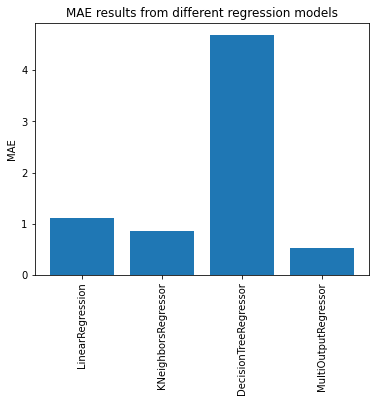

In [ ]:
y_pos = np.arange(len(best_combinations))
names = ()
height = []
for k, v in best_combinations.items():
  height.append(v[0])
  #names = names + (type(k).__name__,)
  names = names + (k, )

plt.bar(y_pos, height)

plt.xticks(y_pos, names, rotation=90)
#plt.subplots_adjust(bottom=0.4)

plt.ylabel("MAE")
plt.title("MAE results from different regression models")
plt.subplots_adjust(top=1)
plt.savefig("MAE results.png")


In [ ]:
for k in best_combinations.keys():
  print(type(k).__name__)

LinearRegression
KNeighborsRegressor
DecisionTreeRegressor
MultiOutputRegressor


In [ ]:
#Function to find difference between two lists
def diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

In [ ]:
#PREPROCESSING DATA FOR NEURAL NETWORK.

data_copy = data.copy()
cols = list(data_copy.columns)

#For neural network it's better to have values between 0 and 1 or -1 to 1 in case of negative values in the column.

#Find features with negative values.
features_neg = data_copy.columns[(data_copy < 0).any()].tolist()

#Columns containing negative values normalize to values between -1 and 1
scaler_neg = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))
data_copy[features_neg] = scaler_neg.fit_transform(data_copy[features_neg])

features = diff(cols, features_neg)

#Normalize other features values between 0 and 1. 
scaler = sklearn.preprocessing.MinMaxScaler()
data_copy[features] = scaler.fit_transform(data_copy[features])

#Normalize label.
scalar = sklearn.preprocessing.MinMaxScaler()
data_copy[['CO2 emissions (metric tons per capita)']] = scalar.fit_transform(data_copy[['CO2 emissions (metric tons per capita)']])

In [ ]:
#Test the best combinations of features with neural network and find MAE.

features = list(data_copy.columns)
features.remove('CO2 emissions (metric tons per capita)')
X = data_copy[features]
y = data_copy[['CO2 emissions (metric tons per capita)']]

features = combinations(features)[1:]

best = 100
best_mse = 100
f_mae = ""
count = 0

for f in features:
  count += 1
  print(count)
  X_train, X_test, y_train, y_test = train_test_split(X[f].values, y.values, test_size=0.3, random_state=12)

  #Create simple neural network model
  model = Sequential() 

  model.add(Dense(4, activation="sigmoid", input_shape=(X_train.shape[1],)))
  model.add(Dense(1, activation="sigmoid"))

  #model.summary()

  model.compile(loss="mean_absolute_error", optimizer="adam")

  #increase batch-size to make model faster
  model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=True)

  y_pred = model.predict(X_test)

  #Convert feature values back to it's original values
  y_pred = scalar.inverse_transform(y_pred)
  y_test = scalar.inverse_transform(y_test)

  result = np.mean(np.abs(y_test - y_pred))

  if result < best:
    best = result
    f_mae = f

print("The best combination of MAE:", f_mae)
print("MAE:", best)


Voogesituse väljund on kärbitud viimase 5000 reani.
285/285 [==============================] - 0s 835us/step - loss: 0.2476
Epoch 3/20
285/285 [==============================] - 0s 842us/step - loss: 0.1138
Epoch 4/20
285/285 [==============================] - 0s 786us/step - loss: 0.0718
Epoch 5/20
285/285 [==============================] - 0s 749us/step - loss: 0.0604
Epoch 6/20
285/285 [==============================] - 0s 764us/step - loss: 0.0556
Epoch 7/20
285/285 [==============================] - 0s 793us/step - loss: 0.0532
Epoch 8/20
285/285 [==============================] - 0s 754us/step - loss: 0.0520
Epoch 9/20
285/285 [==============================] - 0s 766us/step - loss: 0.0512
Epoch 10/20
285/285 [==============================] - 0s 755us/step - loss: 0.0506
Epoch 11/20
285/285 [==============================] - 0s 781us/step - loss: 0.0502
Epoch 12/20
285/285 [==============================] - 0s 798us/step - loss: 0.0498
Epoch 13/20
285/285 [======================

In [ ]:
print(best_combinations)

{LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): [2.3988515401605635, ['Alternative and nuclear energy (% of total energy use)', 'Urban population (% of total population)', 'Manufacturing, value added (annual % growth)', 'Energy use (kg of oil equivalent per capita)', 'Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]']], KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'): [1.7014504247665543, ['Fossil fuel energy consumption (% of total)', 'Alternative and nuclear energy (% of total energy use)', 'Population growth (annual %)', 'Urban population (% of total population)', 'Manufacturing, value added (annual % growth)', 'GDP per capita growth (annual %)', 'Energy use (kg of oil equivalent per capita)']], DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=

Epoch 1/20
285/285 [==============================] - 0s 797us/step - loss: 0.3995
Epoch 2/20
285/285 [==============================] - 0s 768us/step - loss: 0.1826
Epoch 3/20
285/285 [==============================] - 0s 736us/step - loss: 0.0879
Epoch 4/20
285/285 [==============================] - 0s 751us/step - loss: 0.0638
Epoch 5/20
285/285 [==============================] - 0s 762us/step - loss: 0.0565
Epoch 6/20
285/285 [==============================] - 0s 757us/step - loss: 0.0529
Epoch 7/20
285/285 [==============================] - 0s 743us/step - loss: 0.0512
Epoch 8/20
285/285 [==============================] - 0s 745us/step - loss: 0.0502
Epoch 9/20
285/285 [==============================] - 0s 798us/step - loss: 0.0496
Epoch 10/20
285/285 [==============================] - 0s 760us/step - loss: 0.0490
Epoch 11/20
285/285 [==============================] - 0s 757us/step - loss: 0.0483
Epoch 12/20
285/285 [==============================] - 0s 757us/step - loss: 0.0475
E

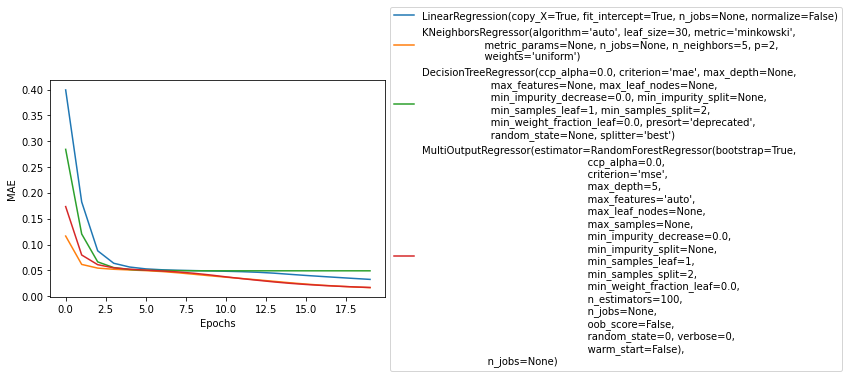

In [ ]:
#Test the best combinations of features from regression models with neural network and find MAE.

best_features = []
for k, v in best_combinations.items():
  best_features.append(v[1])

features = list(data_copy.columns)
features.remove('CO2 emissions (metric tons per capita)')

X = data_copy[features]
y = data_copy[['CO2 emissions (metric tons per capita)']]

best = ""
mae = 100
losses = []

#for f in best_features:
for k, v in best_combinations.items():

  X_train, X_test, y_train, y_test = train_test_split(X[v[1]].values, y.values, test_size=0.3, random_state=12)

  #Create simple neural network model
  model = Sequential() 

  model.add(Dense(4, activation="sigmoid", input_shape=(X_train.shape[1],)))
  model.add(Dense(1, activation="sigmoid"))

  #model.summary()

  model.compile(loss="mean_absolute_error", optimizer="adam")

  hist = model.fit(X_train, y_train, epochs=20, batch_size = 8, verbose=True)
  plt.plot(hist.history["loss"], label=k)

  y_pred = model.predict(X_test)

  #Convert feature values back to it's original values
  y_pred = scalar.inverse_transform(y_pred)
  y_test = scalar.inverse_transform(y_test)

  result = np.mean(np.abs(y_test - y_pred))
  print(v[1])
  print(result)

  if result < mae:
    best = v[1]
    mae = result

print("The best combination from regression models is", '\n', best, '\n', "with MAE", mae)

plt.ylabel("MAE")
plt.xlabel("Epochs")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("Neural network MAE.png")


In [ ]:
data

,"Enrolment in tertiary education, all programmes, both sexes (number) [SE.TER.ENRL]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",Energy use (kg of oil equivalent per capita),GDP per capita growth (annual %),CO2 emissions (metric tons per capita),"Manufacturing, value added (annual % growth)",Urban population (% of total population),Population growth (annual %),Final consumption expenditure (annual % growth),Alternative and nuclear energy (% of total energy use),Fossil fuel energy consumption (% of total)
274,1903454.000,2.140571e+06,5483.816402,0.732400,15.339784,-1.588184,85.7010,1.439217,2.364046,2.154394,89.625630
275,425971.698,3.278168e+05,3800.299420,-0.111540,7.088592,0.853837,57.7150,1.120993,0.593861,12.212879,65.661822
282,504745.000,7.826060e+05,4687.787049,1.443273,8.811836,2.659190,97.8760,0.579446,1.168967,15.110327,75.870784
299,1564125.000,2.303964e+06,7631.341570,-0.089286,15.388950,0.566749,81.2590,0.746339,2.066235,19.770846,74.089062
306,1221774.000,1.477538e+06,2005.551062,1.105944,4.632586,0.196386,87.3600,1.177757,2.576325,5.722212,74.647212
...,...,...,...,...,...,...,...,...,...,...,...
12053,2783470.745,6.885536e+07,253.405898,-1.436075,0.352442,1.961798,18.8805,2.297328,1.957885,1.734492,33.872870
12056,14047.000,1.711885e+06,297.925034,-0.775852,0.250837,0.307100,17.6970,2.077316,-0.494758,1.888520,26.011778
12071,90300.000,5.634782e+06,360.593730,1.914729,0.507018,10.843369,21.4420,2.882694,2.296475,1.286609,43.216347
12076,10347.000,9.357380e+05,319.854259,8.157615,0.813977,42.682490,44.3050,2.197058,5.825571,0.270104,74.663699


In [ ]:
data_copy

,"Enrolment in tertiary education, all programmes, both sexes (number) [SE.TER.ENRL]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",Energy use (kg of oil equivalent per capita),GDP per capita growth (annual %),CO2 emissions (metric tons per capita),"Manufacturing, value added (annual % growth)",Urban population (% of total population),Population growth (annual %),Final consumption expenditure (annual % growth),Alternative and nuclear energy (% of total energy use),Fossil fuel energy consumption (% of total)
274,0.008931,0.002946,0.244899,-0.046800,0.227850,-0.377696,0.844202,-0.504941,-0.155597,0.032605,0.893331
275,0.001997,0.000418,0.168487,-0.074181,0.105258,-0.343123,0.539274,-0.534739,-0.195752,0.184833,0.646935
282,0.002366,0.001053,0.208769,-0.023736,0.130861,-0.317564,0.976857,-0.585449,-0.182707,0.228683,0.751904
299,0.007339,0.003174,0.342371,-0.073459,0.228580,-0.347188,0.795803,-0.569821,-0.162353,0.299217,0.733584
306,0.005732,0.002022,0.087027,-0.034680,0.068768,-0.352431,0.862278,-0.529424,-0.150782,0.086601,0.739323
...,...,...,...,...,...,...,...,...,...,...,...
12053,0.013062,0.095984,0.007501,-0.117154,0.005177,-0.327438,0.116143,-0.424588,-0.164811,0.026250,0.320081
12056,0.000063,0.002348,0.009521,-0.095734,0.003667,-0.350864,0.103248,-0.445190,-0.220446,0.028581,0.239254
12071,0.000421,0.007819,0.012366,-0.008440,0.007473,-0.201698,0.144053,-0.369775,-0.157130,0.019472,0.416151
12076,0.000046,0.001266,0.010517,0.194105,0.012034,0.249059,0.393162,-0.433978,-0.077076,0.004088,0.739492


In [ ]:
#Previously we dropped from dataframe rows that include atleast one NaN. Now we replace Nan's with mean values of the column.
#Let's test our fastest models now and see are the results better than previously.
df_copy = df.copy()
cols = list(df_copy.columns)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for c in cols:
  df_copy[c] = imp.fit_transform(df_copy[[c]])
print('Total sum of NaNs in the dataframe:', total)
print()
df_copy.info()